In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [136]:
!ls drive/MyDrive/DSA3101_Share

2008_airplane_delay.ipynb  2008_data_with_weather.csv  Untitled0.ipynb


In [137]:
df = pd.read_csv('drive/MyDrive/DSA3101_Share/2008_data_with_weather.csv')

In [138]:
df.shape

(2389217, 62)

In [139]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'datetime', 'origin_state', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [140]:
df.drop(['Year', 'DepTime', 'ArrTime', 'FlightNum', 'ActualElapsedTime', 'DepDelay', 'AirTime', \
         'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted','CarrierDelay', 'WeatherDelay', \
         'NASDelay', 'SecurityDelay', 'LateAircraftDelay', \
         'datetime', 'origin_state', 'solarradiation', 'solarenergy', 'severerisk', 'sunrise', 'sunset', \
         'moonphase', 'description', 'icon', 'stations', 'windgust', 'preciptype','uvindex'], axis=1, inplace=True)

In [141]:
df.shape

(2389217, 31)

In [142]:

df.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,ArrDelay,Origin,...,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions
0,1,3,4,1325,1435,WN,N240WN,70.0,16.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
1,1,3,4,1120,1245,WN,N523SW,85.0,2.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
2,1,3,4,2015,2140,WN,N280WN,85.0,-4.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
3,1,3,4,855,1205,WN,N308SA,130.0,-2.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
4,1,3,4,1400,1710,WN,N462WN,130.0,16.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear


In [143]:
df.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
CRSDepTime               0
CRSArrTime               0
UniqueCarrier            0
TailNum              42452
CRSElapsedTime         407
ArrDelay             70096
Origin                   0
Dest                     0
Distance                 0
tempmax             191550
tempmin             191550
temp                191550
feelslikemax        191550
feelslikemin        191550
feelslike           191550
dew                 191550
humidity            191550
precip              194735
precipprob          191550
precipcover         191550
snow                191550
snowdepth           191550
windspeed           191550
winddir             191550
sealevelpressure    191550
cloudcover          191550
visibility          191550
conditions          191550
dtype: int64

In [ ]:
#df[['windgust','windspeed']].value_counts()

In [ ]:
#df.drop(['windgust'], axis=1, inplace=True)

In [ ]:
df.shape[0] - df.dropna().shape[0]

234762

In [ ]:
234762/df.shape[0]

0.09825896936109194

In [ ]:
df.dtypes

Month                 int64
DayofMonth            int64
DayOfWeek             int64
CRSDepTime            int64
CRSArrTime            int64
UniqueCarrier        object
TailNum              object
CRSElapsedTime      float64
Origin               object
Dest                 object
Distance              int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
conditions           object
dtype: object

(array([  2642.,  13799.,  41768., 146596., 310491., 462143., 548543.,
        392870., 243435.,  35380.]),
 array([-24.  , -18.76, -13.52,  -8.28,  -3.04,   2.2 ,   7.44,  12.68,
         17.92,  23.16,  28.4 ]),
 <BarContainer object of 10 artists>)

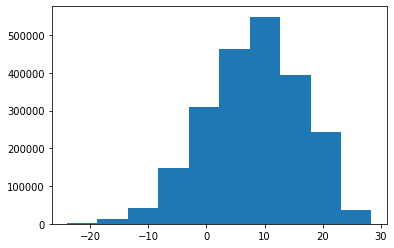

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['temp'])

In [ ]:
df.nunique()

Month                  4
DayofMonth            31
DayOfWeek              7
CRSDepTime          1158
CRSArrTime          1331
UniqueCarrier         20
TailNum             5031
CRSElapsedTime       476
Origin               291
Dest                 293
Distance            1377
tempmax              441
tempmin              432
temp                 452
feelslikemax         502
feelslikemin         529
feelslike            511
dew                  436
humidity             754
precip              1537
precipprob             2
precipcover           25
snow                  89
snowdepth            357
windspeed            466
winddir             2640
sealevelpressure     455
cloudcover           990
visibility           223
conditions            12
dtype: int64

In [ ]:
df['precipprob'].value_counts()

0.0      1398355
100.0     799312
Name: precipprob, dtype: int64

In [144]:
numerical = ['tempmax', 'tempmin', 'temp', 'feelslikemax' ,'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', \
             'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility']

for col in numerical:
  df[col].fillna(df[col].mean(), inplace = True)

df['conditions'].fillna("unknown", inplace=True)

In [ ]:
#df.dropna(inplace = True)

In [145]:
df.shape

(2389217, 31)

In [146]:
df.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,ArrDelay,Origin,...,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions
0,1,3,4,1325,1435,WN,N240WN,70.0,16.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
1,1,3,4,1120,1245,WN,N523SW,85.0,2.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
2,1,3,4,2015,2140,WN,N280WN,85.0,-4.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
3,1,3,4,855,1205,WN,N308SA,130.0,-2.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear
4,1,3,4,1400,1710,WN,N462WN,130.0,16.0,HOU,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear


In [147]:
df['ArrDelayed'] = (df['ArrDelay'] > 0).astype(int)

In [148]:
df.isna().sum()

Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
TailNum             42452
CRSElapsedTime        407
ArrDelay            70096
Origin                  0
Dest                    0
Distance                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
snow                    0
snowdepth               0
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
conditions              0
ArrDelayed              0
dtype: int64

In [149]:
df.drop('ArrDelay', axis=1, inplace=True)

In [150]:
df.dropna(inplace = True)

In [151]:
df.shape

(2346358, 31)

In [152]:
df.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,Origin,Dest,...,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,ArrDelayed
0,1,3,4,1325,1435,WN,N240WN,70.0,HOU,LIT,...,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,1
1,1,3,4,1120,1245,WN,N523SW,85.0,HOU,MAF,...,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,1
2,1,3,4,2015,2140,WN,N280WN,85.0,HOU,MAF,...,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,0
3,1,3,4,855,1205,WN,N308SA,130.0,HOU,MCO,...,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,0
4,1,3,4,1400,1710,WN,N462WN,130.0,HOU,MCO,...,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,1


In [153]:
df.dtypes

Month                 int64
DayofMonth            int64
DayOfWeek             int64
CRSDepTime            int64
CRSArrTime            int64
UniqueCarrier        object
TailNum              object
CRSElapsedTime      float64
Origin               object
Dest                 object
Distance              int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
conditions           object
ArrDelayed            int64
dtype: object

In [154]:
categorical = ['Month', 'DayofMonth', 'DayOfWeek']

In [155]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [156]:
X = df.drop(['ArrDelayed'], axis=1)
y = df['ArrDelayed']

In [157]:
print(X.shape)
print(y.shape)

(2346358, 30)
(2346358,)


In [ ]:
X.drop(['Month', 'DayofMonth', 'DayOfWeek'], axis=1).corrwith(y)

CRSDepTime          0.093772
CRSArrTime          0.093501
CRSElapsedTime      0.027714
Distance            0.025498
tempmax            -0.055857
tempmin            -0.025651
temp               -0.043023
feelslikemax       -0.057988
feelslikemin       -0.039969
feelslike          -0.050505
dew                -0.000487
humidity            0.073612
precip              0.068726
precipprob          0.086171
precipcover         0.093539
snow                0.023139
snowdepth           0.014286
windspeed           0.063109
winddir            -0.010106
sealevelpressure   -0.045518
cloudcover          0.093602
visibility         -0.048197
dtype: float64

In [158]:
feature_names = list(X.columns)

In [159]:
le= LabelEncoder()
le.fit(y)
y = le.transform(y)
class_names = le.classes_

In [160]:
categorical_features = [0,1,2,5,6,8,9,29]

In [161]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
oe.fit(X[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'conditions']])
X[['Month','DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'conditions']] = \
oe.transform(X[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'conditions']])

In [162]:
X.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,Origin,Dest,...,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions
0,0.0,2.0,3.0,1325,1435,17.0,891.0,70.0,127.0,160.0,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,0.0
1,0.0,2.0,3.0,1120,1245,17.0,2430.0,85.0,127.0,166.0,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,0.0
2,0.0,2.0,3.0,2015,2140,17.0,1040.0,85.0,127.0,166.0,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,0.0
3,0.0,2.0,3.0,855,1205,17.0,1154.0,130.0,127.0,170.0,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,0.0
4,0.0,2.0,3.0,1400,1710,17.0,2073.0,130.0,127.0,170.0,...,0.0,0.0,0.0,0.0,15.7,154.3,1038.6,15.3,16.0,0.0


In [163]:
categorical_names = {}
i = 0
for feature in categorical_features:
  categorical_names[feature] = oe.categories_[i]
  i+=1

In [164]:
categorical_names

{0: array([1, 2, 3, 4]),
 1: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 2: array([1, 2, 3, 4, 5, 6, 7]),
 5: array(['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA',
        'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'], dtype=object),
 6: array(['80009E', '80019E', '80059E', ..., 'N999DN', 'NHZOAL', 'Unknow'],
       dtype=object),
 8: array(['ABE', 'ABI', 'ABQ', 'ABY', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ',
        'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'ASE', 'ATL',
        'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGM',
        'BGR', 'BHM', 'BIL', 'BIS', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS',
        'BPT', 'BQK', 'BQN', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF',
        'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CDC', 'CDV', 'CEC', 'CHA',
        'CHO', 'CHS', 'CIC', 'CID', 'CLD', 'CLE', 'CLL', 'CLT', 'CMH',
        'CMI', 'CMX', 'COD', 'COS', 'CPR',

In [204]:
train, test, labels_train, labels_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [166]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [167]:
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [178]:
train.min()

Month                 0.0
DayofMonth            0.0
DayOfWeek             0.0
CRSDepTime            0.0
CRSArrTime            1.0
UniqueCarrier         0.0
TailNum               0.0
CRSElapsedTime      -25.0
Origin                0.0
Dest                  0.0
Distance             24.0
tempmax             -20.5
tempmin             -29.9
temp                -24.0
feelslikemax        -32.1
feelslikemin        -43.5
feelslike           -37.6
dew                 -31.0
humidity              4.9
precip                0.0
precipprob            0.0
precipcover           0.0
snow                  0.0
snowdepth             0.0
windspeed             0.1
winddir               0.0
sealevelpressure    981.8
cloudcover            0.0
visibility            0.5
conditions            0.0
dtype: float64

In [179]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()
train[['CRSElapsedTime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew']] = \
scaler.fit_transform(train[['CRSElapsedTime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew']])

In [206]:
X_train_chi_2, X_test_chi_2, chi_2 = select_features(train, labels_train, test)

In [207]:
for i in range(len(chi_2.scores_)):
 print('Feature %s: %f' % (feature_names[i], chi_2.scores_[i]))

Feature Month: 0.052817
Feature DayofMonth: 0.009858
Feature DayOfWeek: 0.037484
Feature CRSDepTime: 0.008088
Feature CRSArrTime: 0.007339
Feature UniqueCarrier: 0.024510
Feature TailNum: 0.010111
Feature CRSElapsedTime: 0.003199
Feature Origin: 0.010963
Feature Dest: 0.006237
Feature Distance: 0.007668
Feature tempmax: 0.008851
Feature tempmin: 0.008673
Feature temp: 0.009836
Feature feelslikemax: 0.010222
Feature feelslikemin: 0.009468
Feature feelslike: 0.010637
Feature dew: 0.006859
Feature humidity: 0.014446
Feature precip: 0.016308
Feature precipprob: 0.072187
Feature precipcover: 0.008467
Feature snow: 0.002989
Feature snowdepth: 0.003009
Feature windspeed: 0.010306
Feature winddir: 0.025639
Feature sealevelpressure: 0.010221
Feature cloudcover: 0.017403
Feature visibility: 0.026794
Feature conditions: 0.037456


In [187]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

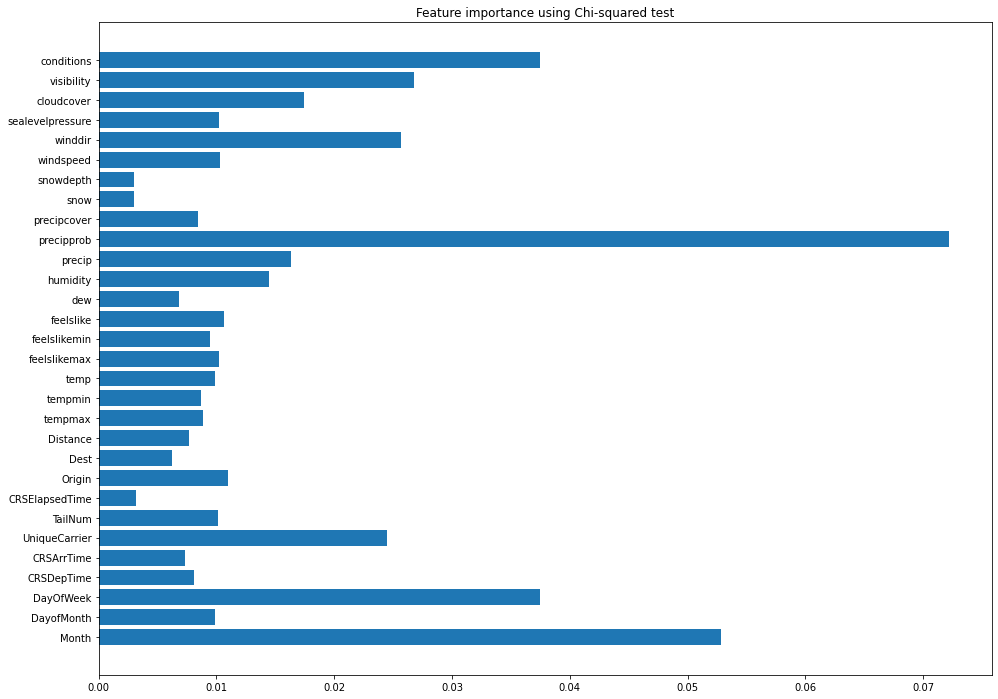

In [208]:
plt.figure(figsize=(16,12))
plt.title('Feature importance using Chi-squared test')
plt.barh(feature_names, chi_2.scores_)

In [196]:
train, test, labels_train, labels_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [198]:
from sklearn.feature_selection import mutual_info_classif

In [199]:
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=mutual_info_classif, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [200]:
X_train_fs, X_test_fs, fs = select_features(train, labels_train, test)

<BarContainer object of 30 artists>

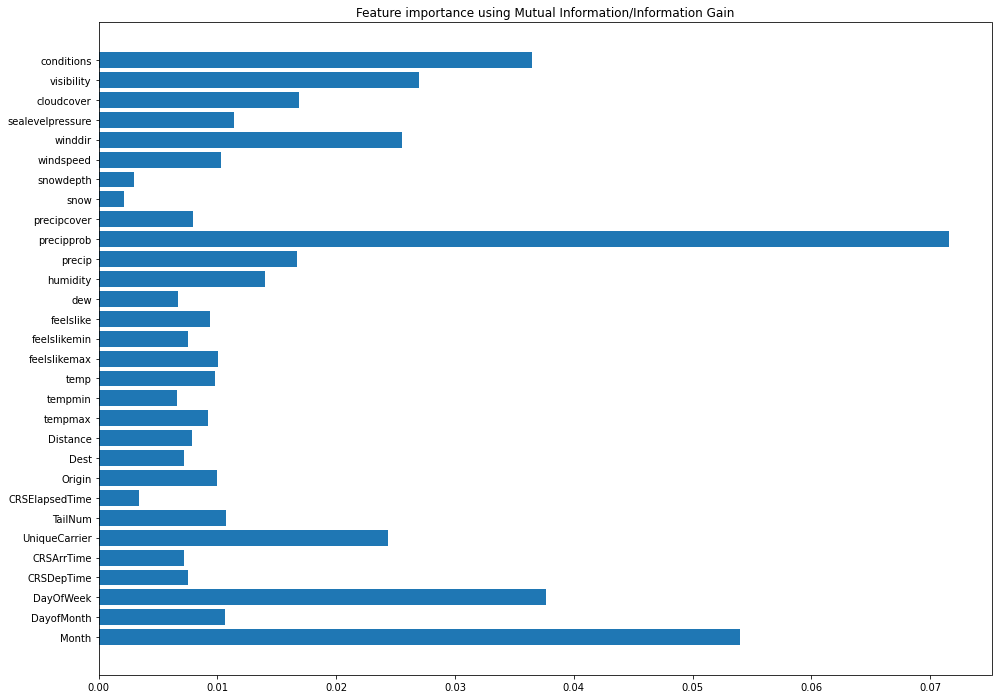

In [202]:
plt.figure(figsize=(16,12))
plt.title('Feature importance using Mutual Information/Information Gain')
plt.barh(feature_names, fs.scores_)

In [209]:
train, test, labels_train, labels_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [210]:
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [211]:
X_train_fs, X_test_fs, fs = select_features(train, labels_train, test)

<BarContainer object of 30 artists>

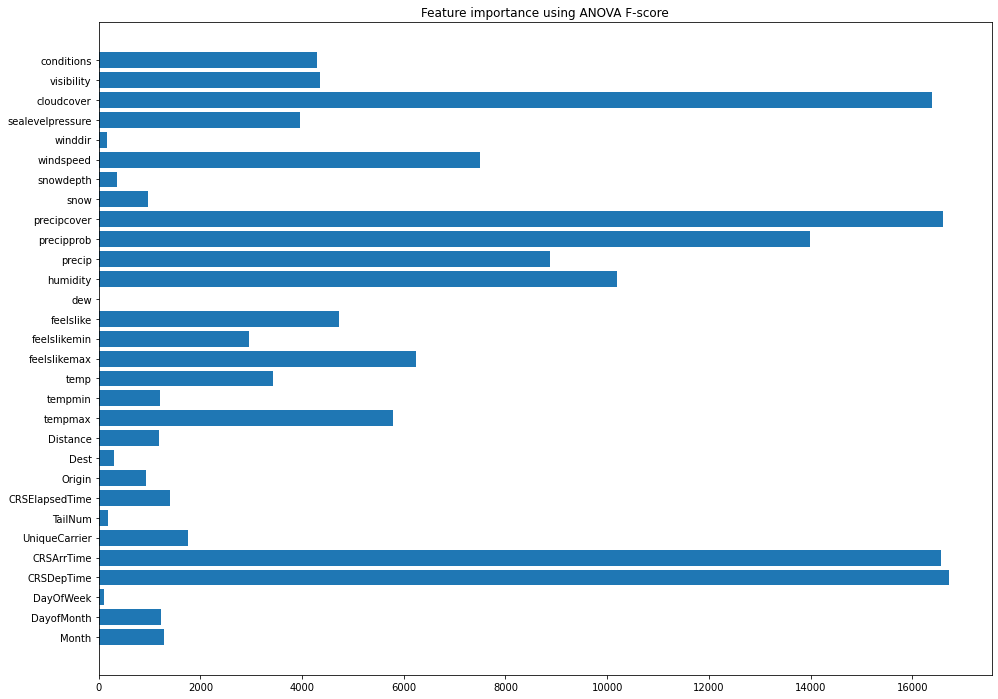

In [212]:
plt.figure(figsize=(16,12))
plt.title('Feature importance using ANOVA F-score')
plt.barh(feature_names, fs.scores_)